In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from vector import Vector
from matrix import Matrix

Espacio para probar numpy

In [ ]:
a = np.array([[1 , 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a[:, 0]

In [ ]:
def gauss_jordan_rec(m, r):
    # Funcion que implementa el algoritmo recursivo de reduccion de una matriz 
    # m = matriz a reducir, r = fila en la que se esta ejecutando (0 inicialmente)

    n_rows, n_cols = m.shape
    pivot_col = r

    # Caso en que la matriz tenga mas filas que columnas
    if r >= n_cols: return

    # Paso 1: Elegir la columna (distinta de cero)
    # más a la izquierda como columna pivot. 
    for i in range(r, n_cols):
        for j in range(n_rows):
            if m[j, i] != 0: break
        pivot_col = i
        break
    
    # Paso 2: Elegir al primer elemento (distinto de cero) de la columna como pivot.
    # Sabemos que el while termina, porque ya se comprobo que esta columna tiene al menos un elemento != 0
    i : int = r # Subindice de primer fila sin 0
    print(pivot_col)
    while pivot_col < n_cols and m[i, pivot_col] == 0:
        i+=1
    # Intercambiamos filas
    # print(i, r)
    m[[i, r]] = m[[r, i]]

    # print(m)

    # Paso 3: Usar sustitución sobre la filas para crear ceros debajo del pivot. 
    for other_row in range(r+1, n_rows):
        below_pivot = m[other_row][pivot_col]
        m[other_row] = [iv - rv * (below_pivot / m[r, pivot_col]) for rv, iv in zip(m[r], m[other_row])]


    # Paso 4: Ignorar la fila que contiene al pivot.
    # Aplicar los pasos de 1 a 3 sobre todas las submatrices restantes. 
    if r+2 < n_rows:
        gauss_jordan_rec(m, r+1)


In [ ]:
b = np.random.randint(0,2, (3,3),)
# b = np.array([
#     [3, 1, 2],
#     [1, 1, 2]
# ])
print(b)
gauss_jordan_rec(b, 0)
b

In [6]:
def reduce_matrix(m):
    # Funcion que implementa el algoritmo de Gauss-Jordan para la reduccion de una matriz
    matrix = m.copy()
    pivot_col = 0
    n_rows, n_cols = matrix.shape

    for row in range(n_rows):

        if pivot_col >= n_cols:
            return matrix
        
        # Encontrar la primera fila con pivot diferent de 0
        # Cuando la encuentre, intercambiarla por la fila en la 
        # que se esta trabajando (Paso 2 del algoritmo)

        # Si no se encuentra ningun pivot != 0 en la primer columna,
        # se continua con la columna de la derecha
        row_pivot = row
        while matrix[row_pivot][pivot_col] == 0:
            row_pivot += 1
            if row_pivot == n_rows:
                row_pivot = row
                pivot_col += 1
                if n_cols == pivot_col:
                    return matrix
        matrix[row_pivot], matrix[row] = matrix[row], matrix[row_pivot]

        # Divide la fila pivot por el pivot propiamente
        # para que sea 1.
        pivot = matrix[row][pivot_col]
        matrix[row] = [mrx / float(pivot) for mrx in matrix[row]]

        # Usar sustitucion en las filas arriba Y debajo del pivot elegido
        # para obtener 0. De esta manera, se obtiene la matriz escalonada
        # reducida.
        for other_row in range(n_rows):
            if other_row != row:
                below_pivot = matrix[other_row][pivot_col]
                matrix[other_row] = [iv - below_pivot * rv for rv, iv in zip(matrix[row], matrix[other_row])]
        pivot_col += 1
    return matrix

In [4]:
def generate_An(n:int) -> np.ndarray:
    return np.vstack([
        np.hstack([
            np.tri(n-1, n-1, -1) * - 1 + np.diag(np.ones(n-1)),
            np.ones((n-1, 1 ))
        ]) ,
        np.concatenate([np.ones( n-1) * -1, [ 1 ]])
    ])

In [68]:
def sistema_An(n:int, b:np.ndarray) -> np.ndarray:
    m_aumentada = np.column_stack((generate_An(n), b))
    return reduce_matrix(m_aumentada)[:, -1]

In [65]:
def error(A:np.ndarray, x:np.ndarray, b:np.ndarray):
    v = A.dot(x) - b
    return v.dot(v)

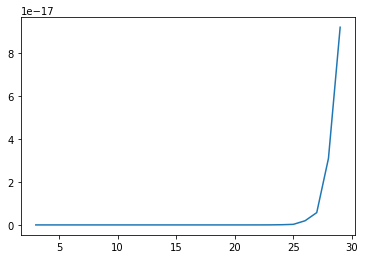

In [85]:
errors:list[int] = []

for n in range(3, 30):
    errors_subn = []
    for i in range(30):
        b = np.random.rand(n, 1)
        x = sistema_An(n, b)
        e = error(generate_An(n), x, b.T[0])
        errors_subn.append(e)
    errors.append(sum(errors_subn) / 30)  

fig, ax = plt.subplots()
ax.plot([n for n in range(3, 30)], errors)
plt.show()

Vemos que el error aumenta de manera exponencial respecto a las dimensiones de A. ¿A que se debe el error?

### Guia 3

In [25]:
# Ejercicio 5

def mat45zeros():
    return np.zeros((4, 5))
    return [[0 for _ in range(5)] for _ in range(4)]

def mat53unos():
    return np.ones((5, 3))

def identidad():
    return np.identity(5)

def diagonal(elems=[3, 4, 2, 5]):
    return np.identity(4) * np.array(elems)

diagonal()

array([[3., 0., 0., 0.],
       [0., 4., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 5.]])

In [47]:
# Ejercicio 6
def randomMatrix(shape:tuple, low:int, high:int) -> list[list]:
    return [[random.randint(low, high) for c in range(shape[1])] for r in range(shape[0])]
# np.random.randint(-9, 10, size=(3, 3))
randomMatrix((3, 3), -9, 9)

[[8, 6, -5], [-8, 9, 2], [-4, -2, -8]]

In [13]:
# Ejercicio 7
A = np.random.rand(4, 4)
I = np.identity(4)
print((A + I).dot((A - I)) - ((A.dot(A)) - I))

B = np.random.rand(4, 4)
print((A + B).dot((A - B)) - ((A.dot(A)) - B))

# Parece que hay mas error en el segundo caso, pero no estoy seguro.

[[ 0.00000000e+00 -4.44089210e-16  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16  0.00000000e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.11022302e-16]]
[[-0.68543512 -1.67451229 -1.60306955 -1.09496208]
 [-0.07380481 -1.22262053 -0.75498369 -1.06913362]
 [ 0.49610909 -0.09074292 -0.82297639  0.11282539]
 [ 1.39174664 -0.12982616 -0.08878714  0.82925604]]


In [5]:
# Ejercicio 8

S = Matrix([
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])

for k in range(2, 6):
    print(S ** k)

Matrix(
[0 1 0 0 0 ]
[0 0 1 0 0 ]
[0 0 0 1 0 ]
[0 0 0 0 1 ]
[0 0 0 0 0 ]
)
Matrix(
[0 0 1 0 0 ]
[0 0 0 1 0 ]
[0 0 0 0 1 ]
[0 0 0 0 0 ]
[0 0 0 0 0 ]
)
Matrix(
[0 0 0 0 1 ]
[0 0 0 0 0 ]
[0 0 0 0 0 ]
[0 0 0 0 0 ]
[0 0 0 0 0 ]
)
Matrix(
[0 0 0 0 0 ]
[0 0 0 0 0 ]
[0 0 0 0 0 ]
[0 0 0 0 0 ]
[0 0 0 0 0 ]
)


In [ ]:
# Ejercicio 9
